In [53]:
import numpy as np
import cv2
from skimage.io import imread,imsave,imshow
import matplotlib.pyplot as plt
import os
import seaborn as sn
from warnings import filterwarnings

In [54]:
filterwarnings('ignore')

In [2]:
path='/home/rijul/Downloads/brain_tumor/archive(3)/brain_tumor_dataset'

In [13]:
images=[]
labels=[]
label=['no','yes']
for i in label:
    for file in os.listdir(path+'/'+i):
        img=imread(path+'/'+i+'/'+file)
        images.append(img)
        labels.append(i)

In [15]:
from keras.preprocessing.image import ImageDataGenerator as IDG

In [16]:
datagen=IDG(rotation_range=40,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [17]:
for n , i in enumerate(images):
    if n==10: break
    print(i.shape)


(417, 428, 3)
(361, 642, 3)
(400, 393, 4)
(630, 630, 3)
(664, 550, 4)
(217, 232, 3)
(454, 442, 4)
(225, 225, 3)
(168, 300, 3)
(340, 339, 3)


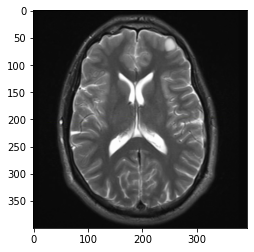

In [20]:
plt.imshow(images[2])

In [28]:
channel_3_imgs=[]
for img in images:
    if len(img.shape) > 2 and img.shape[2] == 4:
        im = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        channel_3_imgs.append(im)
    else:channel_3_imgs.append(img)

In [38]:
all_images=[]
for i in channel_3_imgs:
    if len(i.shape)!=3:
        img2 = cv2.merge((i,i,i))
        all_images.append(img2)
    else: all_images.append(i)

In [42]:
resized_imgs=[]
for i in all_images:
    img=cv2.resize(i,(512,512))
    resized_imgs.append(img)

In [46]:
resized_imgs=np.array(resized_imgs)

In [47]:
resized_imgs.shape

(253, 512, 512, 3)

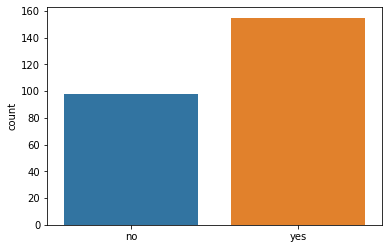

In [55]:
sn.countplot(labels)
plt.show()

In [58]:
labels[97]

'yes'

In [67]:
from keras.preprocessing.image import img_to_array
for i in range(97):
    img=img_to_array(resized_imgs[i])
    img=img.reshape(1,512,512,3)
    aug = datagen.flow(img,batch_size=1)
    for j in range(5):
        batch=aug.next()
        image=batch[0].astype('uint8')
        cv2.imwrite(path+'/'+'no/{}.jpg'.format(i*j),image)

In [68]:
from keras.preprocessing.image import img_to_array
for i in range(98,len(resized_imgs)):
    img=img_to_array(resized_imgs[i])
    img=img.reshape(1,512,512,3)
    aug = datagen.flow(img,batch_size=1)
    for j in range(5):
        batch=aug.next()
        image=batch[0].astype('uint8')
        cv2.imwrite(path+'/'+'yes/{}.jpg'.format(i*j),image)

In [72]:
aug_images=[]
all_labels=[]
label=['no','yes']
for i in label:
    for file in os.listdir(path+'/'+i):
        img=imread(path+'/'+i+'/'+file)
        aug_images.append(img)
        all_labels.append(i)

In [76]:
channel_3_imgs=[]
for img in aug_images:
    if len(img.shape) > 2 and img.shape[2] == 4:
        im = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        channel_3_imgs.append(im)
    else:channel_3_imgs.append(img)
all_images=[]
for i in channel_3_imgs:
    if len(i.shape)!=3:
        img2 = cv2.merge((i,i,i))
        all_images.append(img2)
    else: all_images.append(i)
resized_imgs=[]
for i in all_images:
    img=cv2.resize(i,(512,512))
    resized_imgs.append(img)

In [118]:
from keras.utils import to_categorical
import pandas as pd
y=labels
encoded_labels=pd.get_dummies(y,drop_first=True)

In [119]:
y=to_categorical(encoded_labels)

In [122]:
len(y)

1245

In [121]:
x=np.array(resized_imgs)
from sklearn.model_selection import train_test_split as tts
x_train_val,x_test,y_train_val,y_test=tts(x,y,test_size=0.1)
x_train,x_val,y_train,y_val=tts(x_train_val,y_train_val)

ValueError: Found input variables with inconsistent numbers of samples: [992, 1245]

In [106]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
import tensorflow as tf

In [103]:
input_layer=Input(shape=(512,512,3),name='input_images')
path1=Conv2D(64,(3,3),padding='same',activation='relu')(input_layer)
path2=Conv2D(64,(5,5),padding='same',activation='relu')(input_layer)
path3=Conv2D(64,(7,7),padding='same',activation='relu')(input_layer)
conv1=concatenate([path1,path2,path3])
conv1_out= MaxPool2D(2)(conv1)

conv2=Conv2D(128,(3,3),activation='relu',padding='same')(conv1_out)
conv2=Conv2D(128,(3,3),activation='relu',padding='same')(conv2)
conv2_out=MaxPool2D(2)(conv2)

conv3=Conv2D(256,(3,3),activation='relu',padding='same')(conv2_out)
conv3=Conv2D(256,(3,3),activation='relu',padding='same')(conv3)
conv3=Conv2D(256,(3,3),activation='relu',padding='same')(conv2_out)
conv3_out=MaxPool2D(2)(conv3)

conv4=Conv2D(512,(3,3),activation='relu')(conv3_out)
conv4=Conv2D(512,(3,3),activation='relu')(conv4)
conv4=Conv2D(512,(3,3),activation='relu')(conv4)
conv4_out=MaxPool2D(2)(conv4)

conv5=Conv2D(256,(3,3),activation='relu',padding='same')(conv4_out)
conv5_out=MaxPool2D(2)(conv5)

flat=Flatten()(conv5_out)

fc1=Dense(2000,activation='relu')(flat)
fc2=Dense(100,activation='relu')(fc1)
out=Dense(2,activation='sigmoid')(fc2)

model=Model(inputs=input_layer,outputs=out)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_images (InputLayer)       [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (None, 512, 512, 64) 1792        input_images[0][0]               
__________________________________________________________________________________________________
conv2d_110 (Conv2D)             (None, 512, 512, 64) 4864        input_images[0][0]               
__________________________________________________________________________________________________
conv2d_111 (Conv2D)             (None, 512, 512, 64) 9472        input_images[0][0]               
____________________________________________________________________________________________

In [104]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [109]:
file_path="/home/rijul/models/brain-e-p.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

callbacks=[checkpoint]

In [115]:
with tf.device('/GPU:0'):
    
    hist=model.fit(x_train,y_train,epochs=30,batch_size=64,validation_data=(x_val,y_val),callbacks=callbacks)

Epoch 1/30


ValueError: in user code:

    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 2) vs (None, 2, 2))


In [116]:
y[1]

array([[0., 1.],
       [1., 0.]], dtype=float32)

In [114]:
x.shape

(992, 512, 512, 3)